# Урок 7. Классификация с помощью KNN. Кластеризация K-means

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.
3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 
4. (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

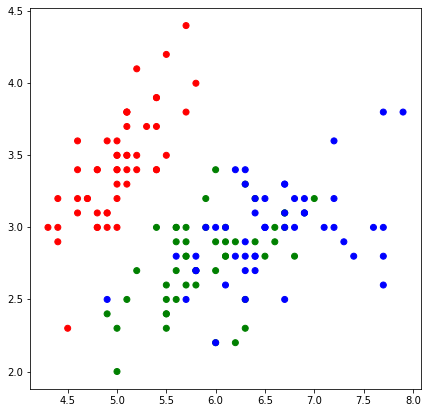

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):      
    return np.linalg.norm(x1 - x2)

In [6]:
def predict(_list, _dict, k):
    for d in sorted(_list)[0:k]:
            _dict[d[1]] += 1
    return _dict

def predict_1(_list, _dict, k):
    for i, d in enumerate(sorted(_list)[0:k]):
            _dict[d[1]] += 1 / (i+1)
    return _dict

def predict_2(_list, _dict, k):
    for i, d in enumerate(sorted(_list)[0:k]):
            _dict[d[1]] += (k + 1 - i) / k
    return _dict

def predict_dist(_list, _dict, k, q: int = 0.7):
    for d in sorted(_list)[0:k]:
            _dict[d[1]] += q**d[0]
    return _dict

def knn(x_train, y_train, x_test, k, predict: callable = predict):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Ищем класс ближайших соседей и считаем к какому классу отнести обьект
        classes = predict(test_distances, classes, k)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
def get_graph(X_train, y_train, k, predict: callable = predict):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .03

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, predict=predict)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

## Задание 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 


Делаю параллельно с заданиями 1 и 2. Выбираю наименьшее значение k, при лучшем значении accuracy (np.argmax по листу accuracy)

## Задание 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.


**KNN из методички:**

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 12: 0.800
Точность алгоритма при k = 13: 0.833
Точность алгоритма при k = 18: 0.800
Точность алгоритма при k = 19: 0.833


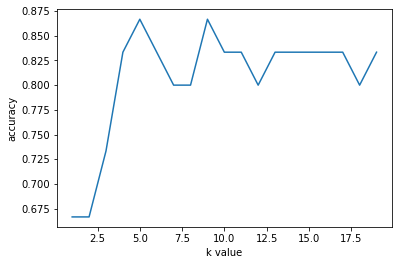

In [10]:
acc_log = [0]
for k in range(1, 20):
    y_pred = knn(X_train, y_train, X_test, k, predict=predict)
    acc = accuracy(y_pred, y_test)
    if acc != acc_log[-1]:
        print(f'Точность алгоритма при k = {k}: {acc:.3f}')
    acc_log.append(acc)
    
plt.plot(range(1, len(acc_log)), acc_log[1:])
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

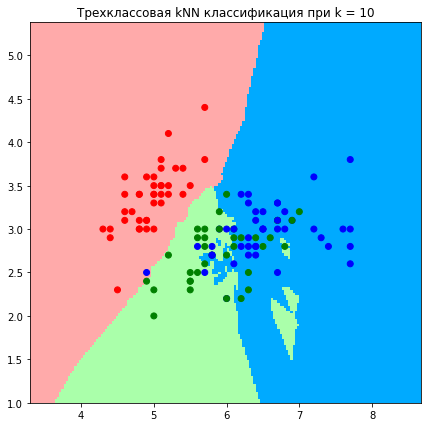

In [18]:
get_graph(X_train, y_train, k=10, predict=predict)

**KNN считающий веса ответов класса по формуле $w(i) = 1\ /\ i$, где i - номер соседа:**

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 8: 0.767


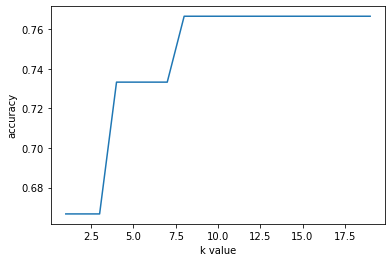

In [19]:
acc_log = [0]
for k in range(1, 20):
    y_pred = knn(X_train, y_train, X_test, k, predict=predict_1)
    acc = accuracy(y_pred, y_test)
    if acc != acc_log[-1]:
        print(f'Точность алгоритма при k = {k}: {acc:.3f}')
    acc_log.append(acc)
    
plt.plot(range(1, len(acc_log)), acc_log[1:])
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

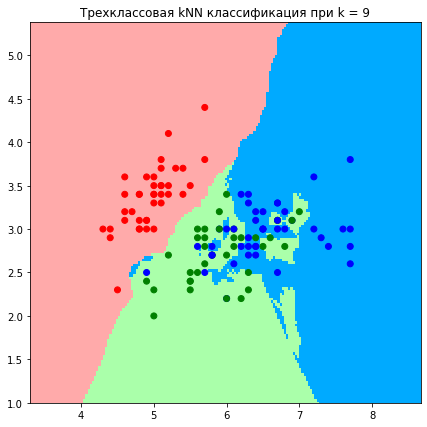

In [22]:
get_graph(X_train, y_train, k=9, predict=predict_1)

**KNN предсказывающий класс, учитывая веса по формуле $w(i) = \frac{k\ +\ 1\ -\ i}{k}$, где k - ограничение ближайших соседей для расчета, i - номер соседа**

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 5: 0.800
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 16: 0.833


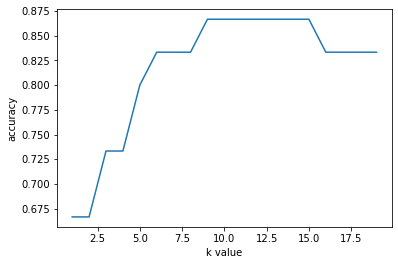

In [20]:
acc_log = [0]
for k in range(1, 20):
    y_pred = knn(X_train, y_train, X_test, k, predict=predict_2)
    acc = accuracy(y_pred, y_test)
    if acc != acc_log[-1]:
        print(f'Точность алгоритма при k = {k}: {acc:.3f}')
    acc_log.append(acc)
    
plt.plot(range(1, len(acc_log)), acc_log[1:])
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

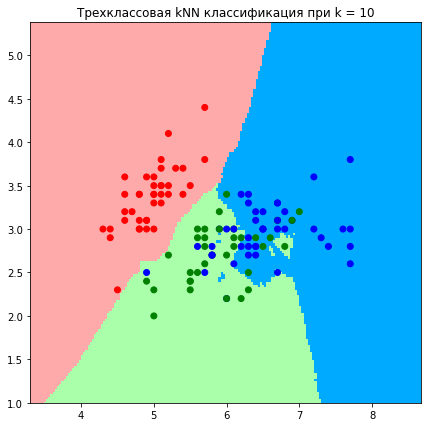

In [23]:
get_graph(X_train, y_train, k=10, predict=predict_2)

## Задание 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.


Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 5: 0.800
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 16: 0.833


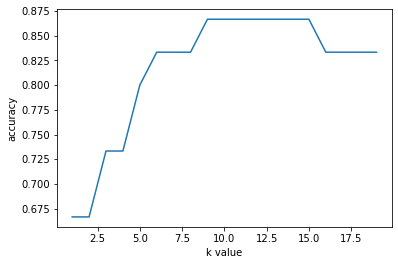

In [21]:
acc_log = [0]
for k in range(1, 20):
    y_pred = knn(X_train, y_train, X_test, k, predict=predict_2)
    acc = accuracy(y_pred, y_test)
    if acc != acc_log[-1]:
        print(f'Точность алгоритма при k = {k}: {acc:.3f}')
    acc_log.append(acc)
    
plt.plot(range(1, len(acc_log)), acc_log[1:])
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

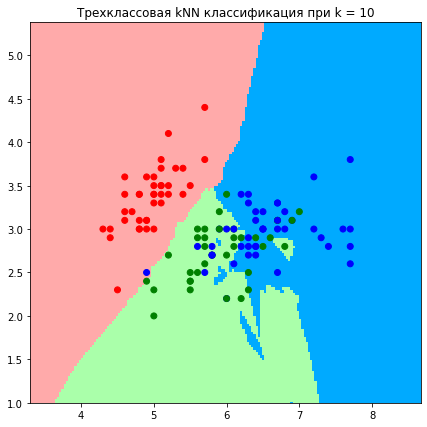

In [24]:
get_graph(X_train, y_train, k=10, predict=predict_dist)

***
**Выводы:**
- лучшее значение accuracy - 0.867
- на 3/4 вариантах модели получилось достичь этого значения, разница только в кол-ве соседей, на которые мы ориентируемся
- лучшими k значениями оказались 9-10, в зависимости от варианта взвешивания "голосов"
- все графики выглядят одновременно одинаково и по-разному. Нет весомых отличий, везде есть погрешности и ошибки, островки класса/артефакты. Такие у нас данные
- хорошо отработал второй вариант добавления весов голосам (третий график), очень мало артефактов на графике
- плохо отработал первый вариант взвешенных голосов 1/i, слишком много внимания ближайшему соседу и мало остальным
- в целом, алгоритмы со взвешенными голосами после 10 учитываемых соседей выходят на плато по accuracy, значит они будут работать стабильнее, чем KNN без взвешенных голосований
***

## Задание 4. (опция). Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

Данные из методички:

In [25]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

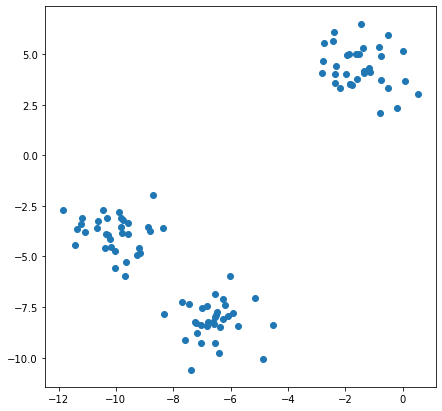

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [27]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [28]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Вот так в идеале должны разбиться данные на кластеры (кол-во кластеров 3)

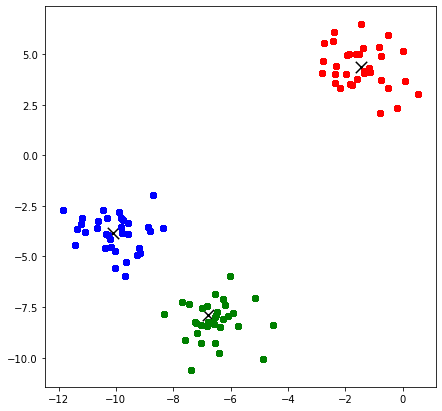

In [29]:
max_iterations = 10
min_distance = 1e-4
k = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Считаем расстояние от каждой точки в кластере к центроиду кластера и усредняем все полученные значения:

In [30]:
def clusters_var(centroids, classes):
    distance = 0
    for label in classes:
        distance += sum(map(lambda x: np.sum(x**2), clusters[label] - centroids[label])) / len(clusters[label])
    return distance

Перебираем кол-во кластеров от 1 до 9 и выводим график зависимости суммы всех внутрикластерных дисперсий от кол-ва кластеров:

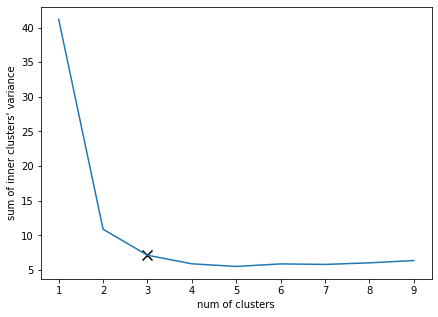

In [31]:
max_iterations = 5
min_distance = 1e-4

var_log = []
for k in range(1, 10):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    var_log.append(clusters_var(centroids, clusters))
    
var_log = np.array(var_log)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 10), var_log)
plt.scatter(3, var_log[2], marker='x', s=100, c='black')
plt.xlabel('num of clusters')
plt.ylabel("sum of inner clusters' variance")
plt.show()

Видим, что при кол-ве кластеров = 3, имеется перегиб в значениях внутрикластерных дисперсий, по правилу локтя и по факту - это и есть оптимальное кол-во кластеров